In [1]:
import pandas as pd
import numpy as np
import os

os.chdir('/home/brian/Documents/CPS/data/')

In [2]:
cols = ['FEMALE', 'AGE', 'YEAR', 'MONTH', 'SAMEEMP', 'CHJOBACT', 'BASICWGT', 'EDUC']

df = pd.concat([pd.read_feather(f'clean/cps{year}.ft', columns=cols)
                  .query('AGE > 15') 
                for year in range(1994, 2021)])

chjobact = (lambda x: x.query('SAMEEMP == 1 and CHJOBACT == 1 and FEMALE == 1').BASICWGT.sum()
                 / x.BASICWGT.sum())

data = (df.groupby(['YEAR', 'MONTH']).apply(chjobact)).reset_index()
data['DATE'] = pd.to_datetime(dict(year=data.YEAR, month=data.MONTH, day=1))
data = data.set_index('DATE').drop(['YEAR', 'MONTH'], axis=1) * 100

<AxesSubplot:xlabel='DATE'>

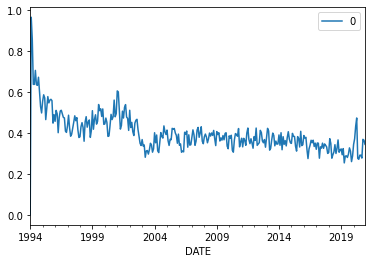

In [3]:
data.plot()